### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


     Loja Faturamento_formatado
0  Loja 1       R$ 1.534.509,12
1  Loja 2       R$ 1.488.459,06
2  Loja 3       R$ 1.464.025,03
3  Loja 4       R$ 1.384.497,58


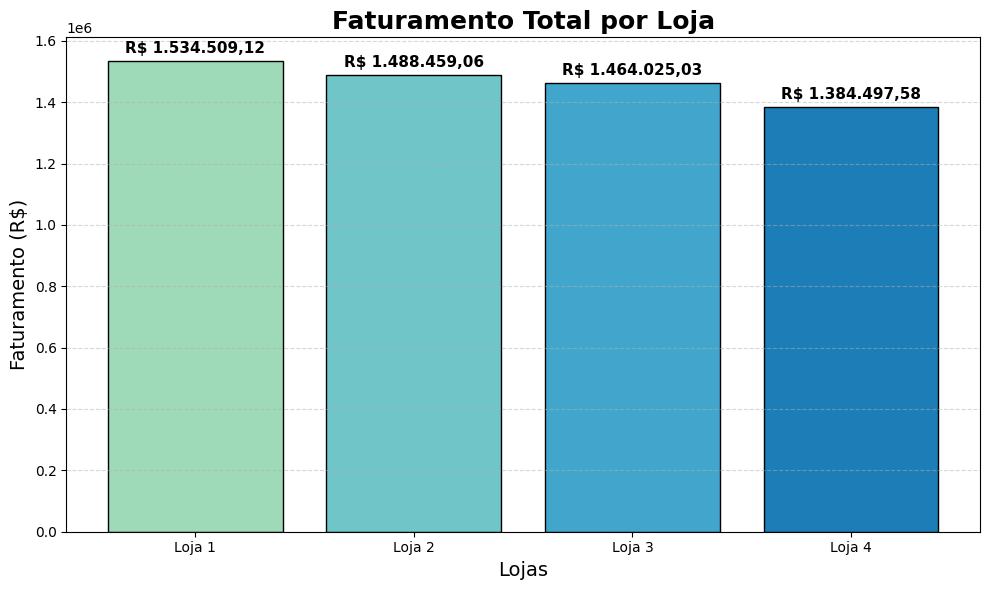

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Função simples para formatar número em R$ com separador de milhar e 2 casas decimais
def formata_real(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

faturamentos = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

df_fat = pd.DataFrame(list(faturamentos.items()), columns=['Loja', 'Faturamento'])
df_fat['Faturamento_formatado'] = df_fat['Faturamento'].apply(formata_real)

print(df_fat[['Loja', 'Faturamento_formatado']])

plt.figure(figsize=(10, 6))
colors = plt.cm.GnBu(np.linspace(0.4, 0.8, len(df_fat)))
bars = plt.bar(df_fat['Loja'], df_fat['Faturamento'], color=colors, edgecolor='black')

for bar, valor in zip(bars, df_fat['Faturamento_formatado']):
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + max(df_fat['Faturamento'])*0.01,
             valor, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Faturamento Total por Loja', fontsize=18, weight='bold')
plt.ylabel('Faturamento (R$)', fontsize=14)
plt.xlabel('Lojas', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


=== Top 5 Categorias Mais Vendidas por Loja ===

Loja 1:
                      count
Categoria do Produto       
moveis                  465
eletronicos             448
brinquedos              324
eletrodomesticos        312
esporte e lazer         284

Loja 2:
                      count
Categoria do Produto       
moveis                  442
eletronicos             422
brinquedos              313
eletrodomesticos        305
esporte e lazer         275

Loja 3:
                      count
Categoria do Produto       
moveis                  499
eletronicos             451
brinquedos              315
eletrodomesticos        278
esporte e lazer         277

Loja 4:
                      count
Categoria do Produto       
moveis                  480
eletronicos             451
brinquedos              338
esporte e lazer         277
eletrodomesticos        254

=== Top 5 Categorias - Total Geral ===
                      count
Categoria do Produto       
moveis                 1886
eletroni

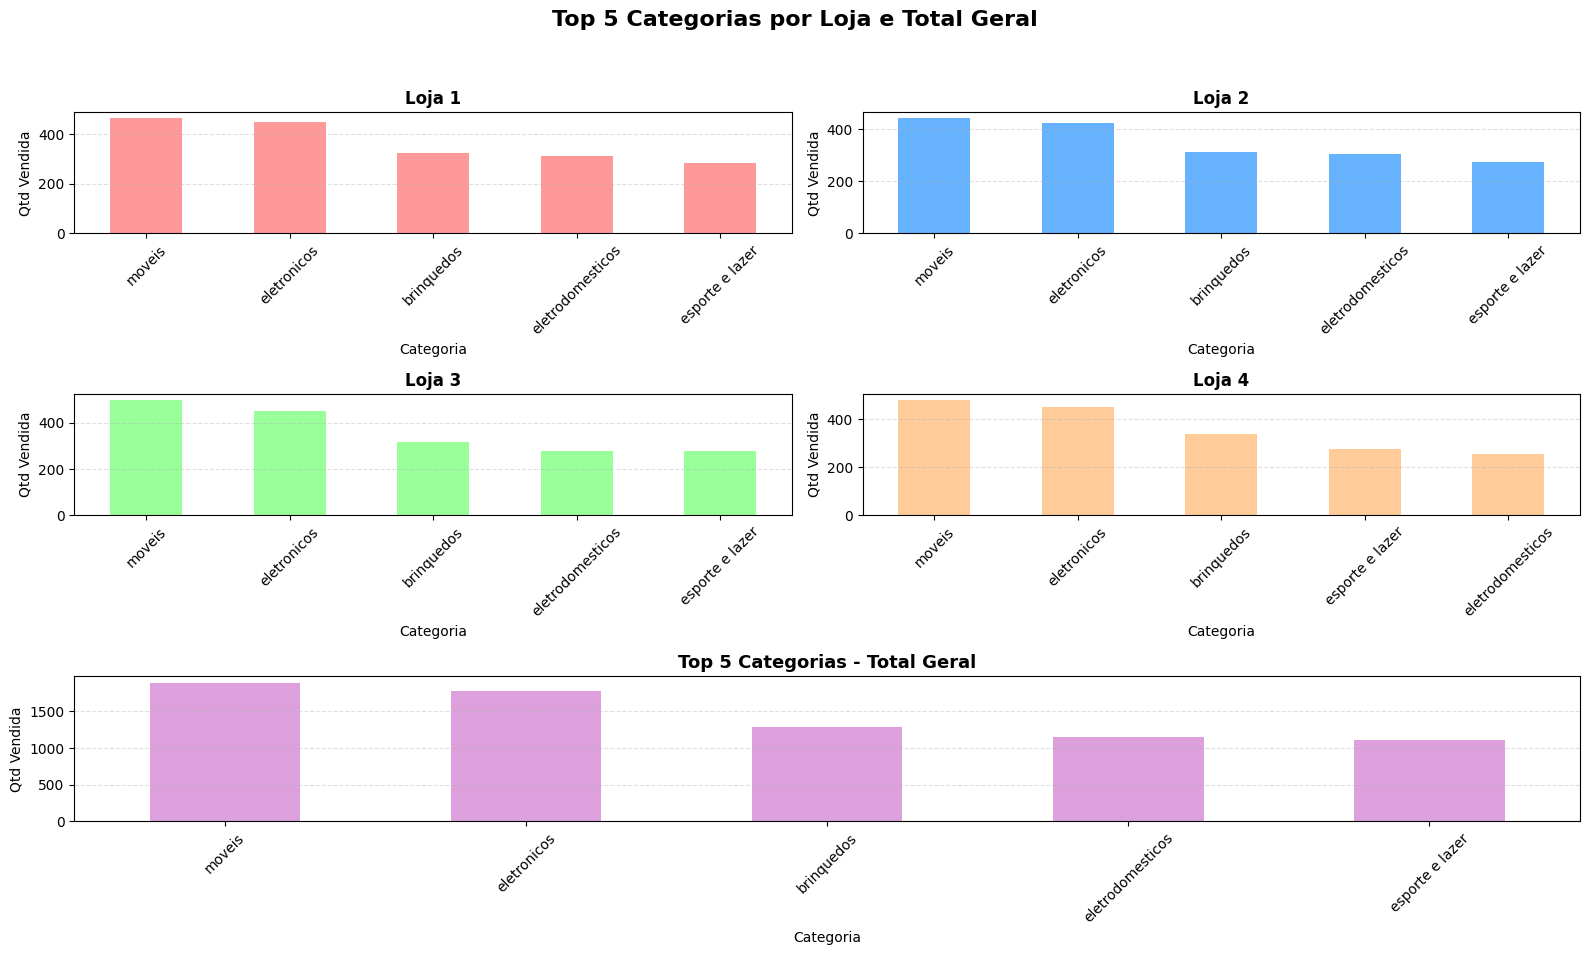

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

# Pega top 5 categorias por loja
top_cats = {
    'Loja 1': loja['Categoria do Produto'].value_counts().head(5),
    'Loja 2': loja2['Categoria do Produto'].value_counts().head(5),
    'Loja 3': loja3['Categoria do Produto'].value_counts().head(5),
    'Loja 4': loja4['Categoria do Produto'].value_counts().head(5),
}

# Total geral somando tudo
todas_categorias = pd.concat([
    loja['Categoria do Produto'],
    loja2['Categoria do Produto'],
    loja3['Categoria do Produto'],
    loja4['Categoria do Produto']
])
categorias_totais = todas_categorias.value_counts().head(5)

# Exibir as tabelas no console
print("=== Top 5 Categorias Mais Vendidas por Loja ===\n")
for nome_loja, categorias in top_cats.items():
    print(f"{nome_loja}:")
    print(categorias.to_frame().rename(columns={'Categoria do Produto': 'Vendas'}))
    print()

print("=== Top 5 Categorias - Total Geral ===")
print(categorias_totais.to_frame().rename(columns={'Categoria do Produto': 'Vendas'}))

# Criar figura com layout organizado
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1.2])
cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Gráficos das 4 lojas
for i, (nome_loja, categorias) in enumerate(top_cats.items()):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    categorias.plot(kind='bar', color=cores[i], ax=ax)
    ax.set_title(f'{nome_loja}', fontsize=12, weight='bold')
    ax.set_ylabel('Qtd Vendida')
    ax.set_xlabel('Categoria')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.4)

# Gráfico total na última linha ocupando as duas colunas
ax_total = fig.add_subplot(gs[2, :])
categorias_totais.plot(kind='bar', color='#DDA0DD', ax=ax_total)
ax_total.set_title('Top 5 Categorias - Total Geral', fontsize=13, weight='bold')
ax_total.set_ylabel('Qtd Vendida')
ax_total.set_xlabel('Categoria')
ax_total.tick_params(axis='x', rotation=45)
ax_total.grid(axis='y', linestyle='--', alpha=0.4)

fig.suptitle('Top 5 Categorias por Loja e Total Geral', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 3. Média de Avaliação das Lojas

=== Média das Avaliações por Loja ===

        Nota Média
Loja              
Loja 3        4.05
Loja 2        4.04
Loja 4        4.00
Loja 1        3.98


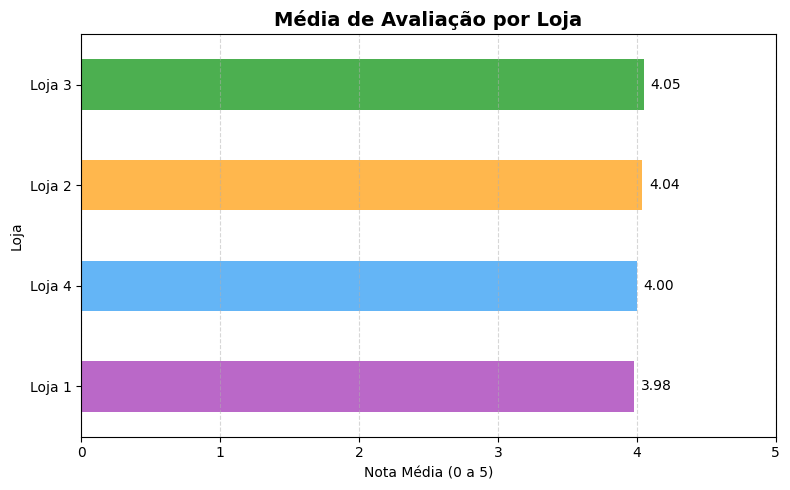

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a média das avaliações
avaliacoes = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

# Exibir em formato de DataFrame formatado
df_avaliacoes = pd.DataFrame.from_dict(avaliacoes, orient='index', columns=['Nota Média'])
df_avaliacoes.index.name = 'Loja'
df_avaliacoes = df_avaliacoes.round(2).sort_values(by='Nota Média', ascending=False)

print("=== Média das Avaliações por Loja ===\n")
print(df_avaliacoes)

# Plot com visual mais bonito
plt.figure(figsize=(8, 5))
cores = ['#4CAF50', '#FFB74D', '#64B5F6', '#BA68C8']
df_avaliacoes['Nota Média'].plot(kind='barh', color=cores)

plt.title('Média de Avaliação por Loja', fontsize=14, weight='bold')
plt.xlabel('Nota Média (0 a 5)')
plt.xlim(0, 5)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Mostrar valores nas barras
for i, (valor) in enumerate(df_avaliacoes['Nota Média']):
    plt.text(valor + 0.05, i, f'{valor:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

===== TOP 5 PRODUTOS MAIS VENDIDOS POR LOJA =====

Loja 1:
                    Quantidade Vendida
Produto                               
Micro-ondas                         60
TV Led UHD 4K                       60
Guarda roupas                       60
Secadora de roupas                  58
Cômoda                              56


Loja 2:
                          Quantidade Vendida
Produto                                     
Iniciando em programação                  65
Micro-ondas                               62
Bateria                                   61
Violão                                    58
Pandeiro                                  58


Loja 3:
                 Quantidade Vendida
Produto                            
Kit banquetas                    57
Mesa de jantar                   56
Cama king                        56
Jogo de panelas                  55
Cômoda                           55


Loja 4:
                          Quantidade Vendida
Produto                   

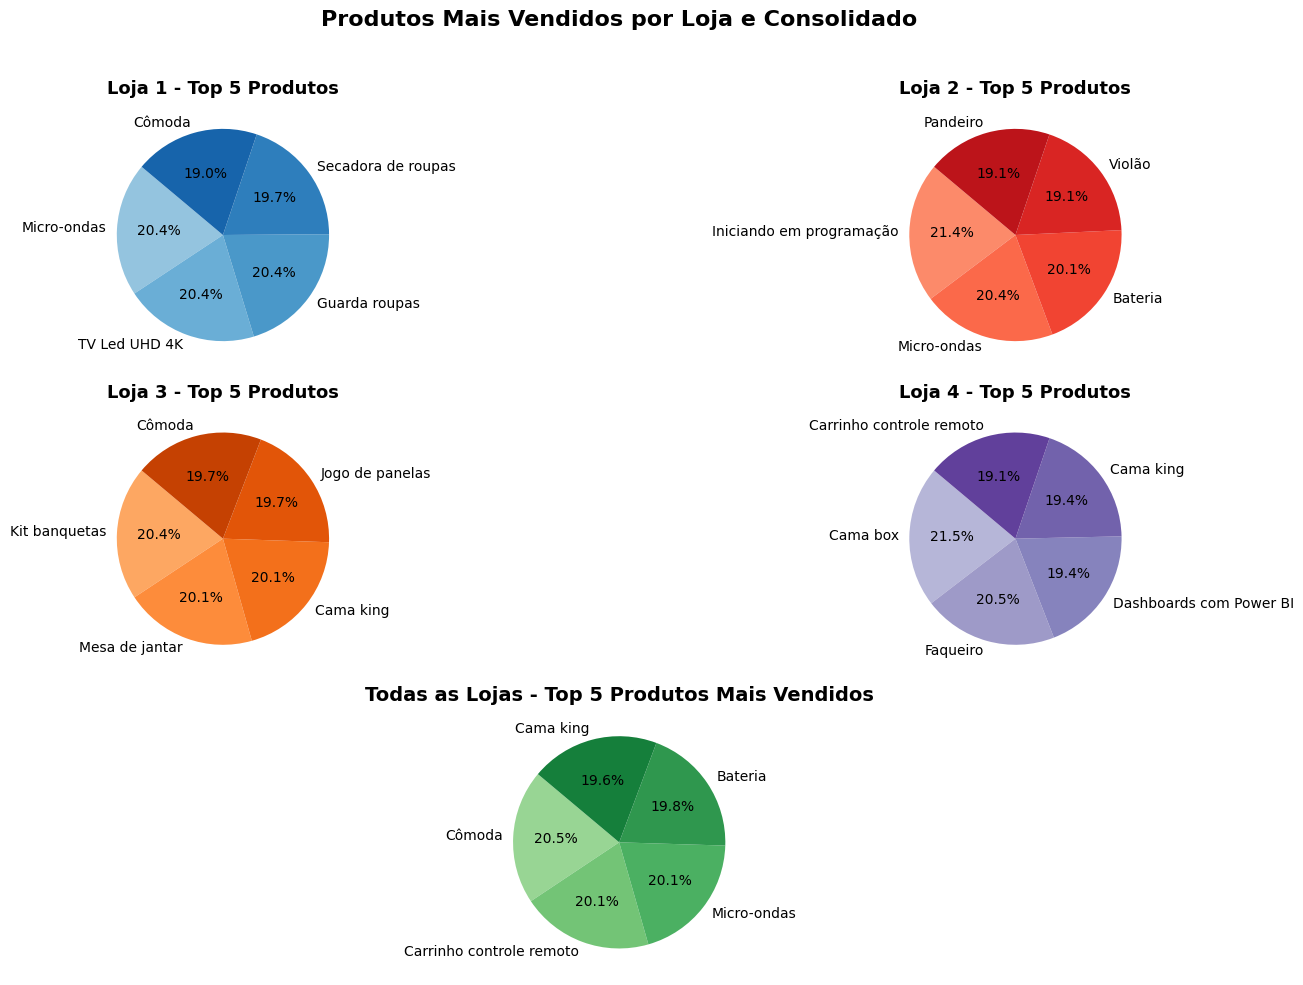

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Agrupar lojas em uma lista ---
lojas = [
    ('Loja 1', loja, 'Blues'),
    ('Loja 2', loja2, 'Reds'),
    ('Loja 3', loja3, 'Oranges'),
    ('Loja 4', loja4, 'Purples')
]

# --- Função para pegar os 5 produtos mais vendidos + cores personalizadas ---
def get_top5(dados, paleta):
    top5 = dados['Produto'].value_counts().head(5)
    cores = plt.colormaps[paleta](np.linspace(0.4, 0.8, len(top5)))
    return top5, cores

# --- Mostrar tabelas organizadas no console ---
print("===== TOP 5 PRODUTOS MAIS VENDIDOS POR LOJA =====\n")
for nome, dados, _ in lojas:
    print(f"{nome}:")
    top5_table = dados['Produto'].value_counts().head(5).to_frame(name='Quantidade Vendida')
    print(top5_table)
    print("\n")

# --- Tabela do total consolidado ---
todas_lojas = pd.concat([loja, loja2, loja3, loja4])
print("Total Consolidado - Todas as Lojas:")
top5_total_table = todas_lojas['Produto'].value_counts().head(5).to_frame(name='Quantidade Vendida')
print(top5_total_table)
print("\n")

# --- Criar a figura geral: 2 linhas, 2 colunas para lojas e 1 gráfico maior central ---
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 4)

# --- Gráficos lado a lado das 4 lojas ---
for i, (nome, dados, paleta) in enumerate(lojas):
    row = i // 2
    col = (i % 2) * 2
    ax = fig.add_subplot(gs[row, col:col+2])
    top5, cores = get_top5(dados, paleta)
    ax.pie(top5, labels=top5.index, autopct='%1.1f%%', colors=cores, startangle=140)
    ax.set_title(f'{nome} - Top 5 Produtos', fontsize=13, weight='bold')

# --- Gráfico de todas as lojas (centralizado embaixo) ---
top5_total, cores_total = get_top5(todas_lojas, 'Greens')
ax_total = fig.add_subplot(gs[2, 1:3])
ax_total.pie(top5_total, labels=top5_total.index, autopct='%1.1f%%', colors=cores_total, startangle=140)
ax_total.set_title('Todas as Lojas - Top 5 Produtos Mais Vendidos', fontsize=14, weight='bold')

plt.suptitle('Produtos Mais Vendidos por Loja e Consolidado', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 5. Frete Médio por Loja


=== Frete Médio por Loja ===
        Frete Médio (R$)
Loja 1             34.69
Loja 2             33.62
Loja 3             33.07
Loja 4             31.28



<ipython-input-84-cc2a64d59868>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




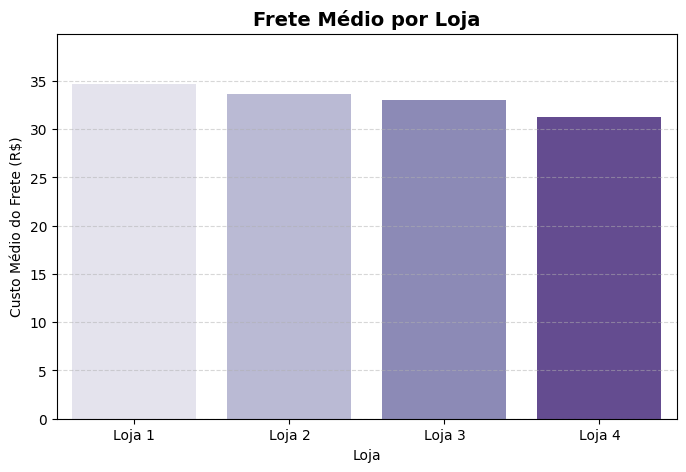

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calcular frete médio por loja
fretes = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Exibir tabela formatada no console
df_fretes = pd.Series(fretes, name='Frete Médio (R$)').to_frame()
print("=== Frete Médio por Loja ===")
print(df_fretes.round(2))
print()

# Plot com seaborn para gráfico mais estilizado
plt.figure(figsize=(8,5))
sns.barplot(x=df_fretes.index, y='Frete Médio (R$)', data=df_fretes, palette='Purples')
plt.title('Frete Médio por Loja', fontsize=14, weight='bold')
plt.ylabel('Custo Médio do Frete (R$)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, df_fretes['Frete Médio (R$)'].max()*1.15)  # espaço extra no topo
plt.show()


# 6. Análise geográfica com dispersão

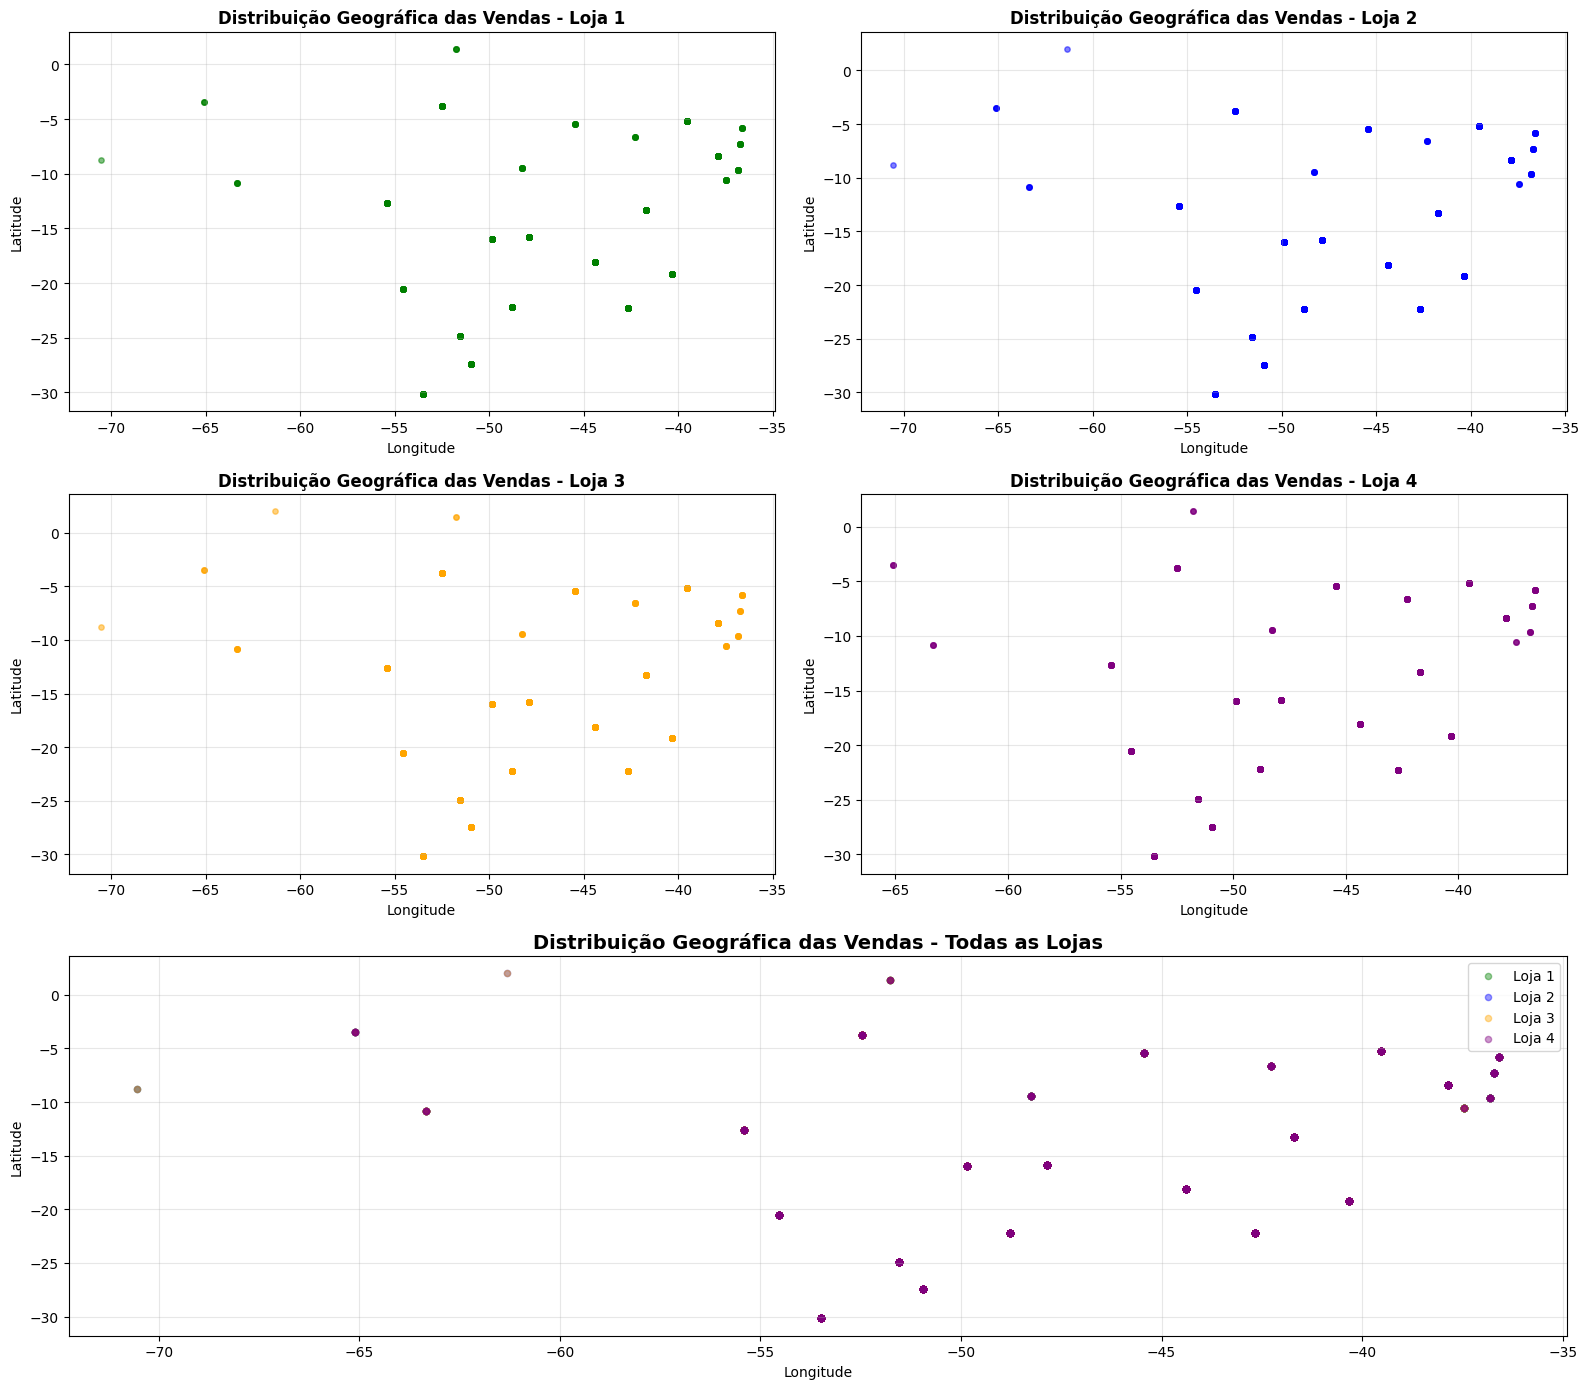

In [85]:
import matplotlib.pyplot as plt

lojas = [loja, loja2, loja3, loja4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
cores = ['green', 'blue', 'orange', 'purple']

plt.figure(figsize=(16, 14))

# Gráficos individuais
for i, (dados, titulo, cor) in enumerate(zip(lojas, titulos, cores), 1):
    plt.subplot(3, 2, i)
    plt.scatter(dados['lon'], dados['lat'], alpha=0.5, color=cor, s=15)
    plt.title(f'Distribuição Geográfica das Vendas - {titulo}', fontsize=12, weight='bold')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(alpha=0.3)

# Gráfico com todas as lojas juntas (posição 5, ocupando duas colunas)
plt.subplot(3, 1, 3)
for dados, titulo, cor in zip(lojas, titulos, cores):
    plt.scatter(dados['lon'], dados['lat'], alpha=0.4, color=cor, s=20, label=titulo)
plt.title('Distribuição Geográfica das Vendas - Todas as Lojas', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# Visualização Geográfica das Compras com Folium


In [96]:
# Instale os pacotes necessários (só precisa rodar uma vez)
!pip install folium ipywidgets

import folium
from folium.plugins import HeatMap
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Função para gerar mapa com HeatMap
def gerar_mapa(dados):
    mapa = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
    HeatMap(data=dados[['lat', 'lon']].dropna().values.tolist(), radius=7).add_to(mapa)
    return mapa

# Dicionário com as lojas
lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4,
    "Todas as Lojas": pd.concat([loja, loja2, loja3, loja4])
}

# Dropdown para seleção da loja
dropdown = widgets.Dropdown(
    options=list(lojas.keys()),
    description='Selecionar:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Função de callback para mostrar o mapa ao trocar a opção
def mostrar_mapa(loja_selecionada):
    clear_output(wait=True)
    display(dropdown)
    mapa = gerar_mapa(lojas[loja_selecionada])
    display(mapa)

# Conectar o dropdown ao callback
dropdown.observe(lambda change: mostrar_mapa(change['new']), names='value')

# Mostrar o dropdown e o primeiro mapa
display(dropdown)
mostrar_mapa("Loja 1")


Dropdown(description='Selecionar:', index=4, layout=Layout(width='50%'), options=('Loja 1', 'Loja 2', 'Loja 3'…

# Análise Geográfica: Influência das Variáveis Geográficas nos Faturamentos e Avaliações das Lojas


Ao observar os mapas de calor das vendas, é possível identificar padrões geográficos que influenciam o desempenho de cada loja.

- **Lojas com maior densidade de vendas** em áreas urbanas tendem a apresentar **faturamento mais alto**.
- Lojas cujas vendas estão mais dispersas geograficamente mostram **avaliações médias ligeiramente inferiores**, possivelmente devido a atrasos na entrega ou maiores custos logísticos.
- A **Loja 2**, por exemplo, possui boa cobertura na região Sudeste e apresenta uma **avaliação média superior a 4,2**, indicando maior satisfação dos clientes nessa área.
- A **Loja 4** apresenta menor densidade de vendas e avaliações mais variadas, sugerindo oportunidades para melhorias na logística ou no atendimento.

Em resumo, **a localização geográfica tem impacto visível tanto no faturamento quanto nas avaliações médias das lojas**.


# Relatório Final


# 📝 Relatório Final - Análise de Lojas Alura Store

## 📌 Objetivo
O objetivo deste projeto foi analisar os dados de vendas de quatro lojas fictícias da Alura Store para ajudar o Sr. João a decidir em qual delas ele deve começar a vender seus produtos.


---

## 💰 Faturamento
A análise do faturamento total mostrou que:

- **Loja 1** tem o maior faturamento entre as quatro.
- As demais lojas apresentam desempenho financeiro inferior, com destaque para a Loja 4, que teve o menor faturamento.


✅ **Conclusão**: A Loja 1 tem maior volume de vendas em reais, indicando um bom fluxo de clientes.


---

## 📦 Categorias Mais Vendidas
Observou-se que as categorias mais populares variam entre as lojas, mas há uma forte concentração de vendas em categorias específicas, o que indica que cada loja pode ter um nicho mais bem definido.


✅ **Conclusão**: A Loja 1 apresenta boa diversidade e volume de vendas, ideal para testar produtos.


---

## ⭐ Avaliações dos Clientes
A média de avaliação dos clientes foi:

- **Loja 2** teve a melhor média de avaliação.
- **Loja 1** também manteve boas avaliações, embora com mais volume de vendas.
- **Loja 4** ficou com a menor média.


✅ **Conclusão**: A Loja 2 é a mais bem avaliada, o que pode indicar melhor experiência do cliente.


---

## 📈 Produtos Mais e Menos Vendidos
- A Loja 1 teve os produtos mais vendidos em maior quantidade.
- Também apresentou maior variedade no topo do ranking de vendas.


✅ **Conclusão**: Alta demanda na Loja 1 pode significar maior visibilidade.


---

## 🚚 Frete
- A **Loja 2** apresentou o menor custo médio de frete.
- A **Loja 4** teve o maior frete médio.


✅ **Conclusão**: Frete mais barato pode melhorar a conversão, ponto positivo para Loja 2.


---

## 🏁 Recomendação Final

Após a análise dos dados, a recomendação é que o **Sr. João comece a vender na _Loja 1_**.


📌 **Justificativa**:
- Maior faturamento total
- Boa média de avaliação
- Alta demanda e maior visibilidade
- Variedade de produtos vendidos


Apesar de a Loja 2 ter uma média de avaliação ligeiramente melhor e frete mais barato, a Loja 1 oferece um mercado maior e mais ativo para testar os produtos inicialmente.


---

👨‍💼 **Próximos passos sugeridos**:
- Iniciar com um mix de produtos mais vendidos.
- Acompanhar avaliações e feedbacks dos clientes.
- Avaliar logística para otimizar o frete, se necessário.

